In [1]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr
import random

from load_data import *
from pred_score import *
from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *
from overlap_genes import *

# Baseline with preselected genes for BIDDY D15 2

In [2]:
#Load preprocess data
D152 = np.array(pd.read_csv ('../data/processed_data/D152csv_process.csv'))
y = np.array(D152[:,-1],dtype=int)
D152 = D152[:,0:-1]

In [3]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152,y,4)

In [4]:
print(D152.shape, len(pred))
acc = model.score_
print(acc)

(88, 2033) 88
0.4583333333333333


In [9]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 0.9424778761061947, 0.4583333333333333, 1.0, 0.5416666666666666, 0.0)


In [2]:
random.seed(3)
np.random.seed(3)

# Filter methods

# Mutual information maximizer (MIM)

[  20  192  318  320  321  573  574  733  780  802  846  965  966 1087
 1127 1207 1348 1490 1562 1633 1643 1938 1954 1978 2019] 1.0


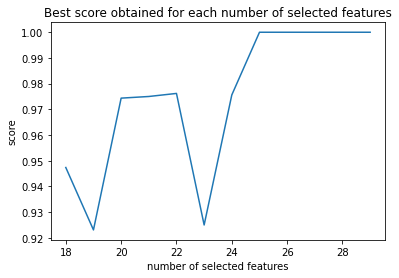

In [11]:
N = np.arange(18,30,1)
best_subset, best_score = MIM(y, D152, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [12]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

25
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9772727272727273, 1.0, 1.0, 0.9994946942900454, 0.0, 0.022727272727272728)


# Mutual information feature selection (MIFS)


[  12   14   21   22   39   40   41   44   53   58   63   76   80   85
   86   95   96   99  101  105  111  118  129  134  143  144  145  150
  154  165  167  168  174  175  180  185  188  194  199  201  204  207
  213  218  221  223  225  236  237  243  246  257  264  268  269  288
  291  299  308  312  317  318  327  333  335  337  338  339  351  358
  359  360  366  373  381  384  390  417  420  423  427  437  443  445
  448  452  454  457  461  462  470  478  479  480  484  486  494  503
  506  518  521  531  537  540  549  557  579  580  583  597  603  615
  623  627  630  640  646  648  650  651  653  660  665  667  671  673
  675  677  681  683  689  699  706  713  717  718  725  729  737  740
  742  743  752  754  755  766  772  775  777  778  784  785  787  788
  793  797  800  805  813  817  822  830  832  843  847  849  859  869
  871  874  889  892  899  906  911  916  930  932  935  951  955  969
  973  977  979  981  982  987  990  995 1006 1017 1020 1029 1037 1051
 1058 

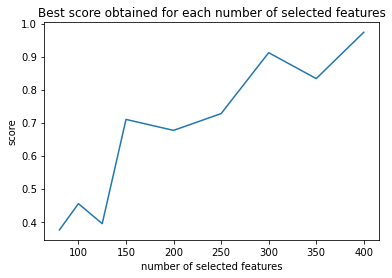

In [12]:
N = np.array([80,100,125,150,200,250,300,350,400])
best_subset, best_score = MIFS(y, D152, FamiliesClusters, compute_precision,True,N, 1, plot=True)
print(best_subset, best_score)

In [13]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8409090909090909, 0.9995794785534062, 0.9736842105263158, 0.9970637583892618, 0.02631578947368421, 0.1590909090909091)


# Joint Mutual Information (JMI)

In [ ]:
N = np.array([80,100,125,150,200,250])
best_subset, best_score = JMI(y, D152, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [15]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

250
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.2892561983471074, 0.967331499312242, 0.08433734939759036, 0.9924148879872994, 0.9156626506024096, 0.7107438016528925)


# Double input symmetrical relevance (DISR)

In [1]:
N = np.array([80,100,125,150,200,250,300,400])
best_subset, best_score = DISR(y, D152, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

NameError: name 'np' is not defined

In [14]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8409090909090909, 0.9986510791366906, 0.925, 0.9968581687612208, 0.075, 0.1590909090909091)


# Fisher's score

[   1    2    3    6    9   14   15   17   18   21   29   32   33   34
   35   36   40   42   43   47   48   49   53   55   57   62   66   68
   69   71   73   78   80   81   84   89   93   94   96   97   98   99
  100  101  102  105  108  109  112  115  116  118  126  130  131  132
  134  138  146  148  150  151  156  158  167  171  175  178  183  186
  187  188  189  192  196  199  200  201  203  208  211  214  220  221
  222  223  227  228  229  230  237  240  241  243  244  250  252  253
  255  256  261  262  264  269  270  271  272  273  274  277  278  279
  283  286  289  290  299  300  302  306  310  313  315  316  317  318
  319  320  321  328  329  330  331  333  334  336  338  341  342  347
  348  351  354  356  363  365  367  373  374  375  376  383  384  386
  388  389  390  393  396  397  400  402  405  406  407  409  411  413
  415  416  418  420  421  423  424  425  428  429  431  432  435  436
  439  445  446  447  450  453  454  456  460  464  466  469  470  471
  473 

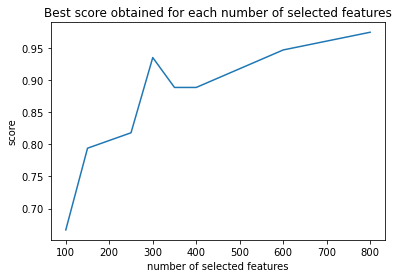

In [15]:
N = np.array([100,150,250,300,350,400,600,800])
best_subset, best_score = fishers_score(y, D152, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [17]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

800
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8863636363636364, 0.9995503597122302, 0.975, 0.9977558348294434, 0.025, 0.11363636363636363)


# Laplacian score

[   0    3    7    9   14   15   28   30   33   34   47   53   55   57
   59   65   66   71   77   79   82   83   87   89   95   98  113  114
  116  120  122  139  147  161  163  165  167  175  185  191  212  213
  214  216  218  224  227  229  233  235  249  252  254  257  259  267
  271  273  275  280  282  286  289  290  292  303  305  308  309  312
  315  316  319  320  331  332  336  340  352  353  356  361  368  371
  383  387  397  399  401  402  404  406  407  413  414  415  428  437
  441  454  457  459  461  464  466  479  484  489  496  497  503  508
  509  510  521  524  528  534  538  539  543  550  556  565  570  572
  573  578  594  607  619  620  621  624  625  626  628  633  636  637
  644  650  654  668  673  677  678  683  689  698  699  702  710  714
  721  724  728  730  740  750  764  768  769  771  772  776  778  784
  786  791  796  797  798  800  808  815  816  818  821  822  837  840
  842  855  859  867  869  870  872  883  886  892  899  907  914  926
  927 

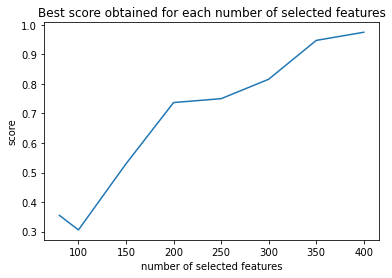

In [18]:
N = np.array([80,100,150,200,250,300,350,400])
best_subset, best_score = laplacian_score(y, D152, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [19]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8863636363636364, 0.9995503597122302, 0.975, 0.9977558348294434, 0.025, 0.11363636363636363)


# ReliefF algorithm

[   0    8   11   20   23   30   31   34   37   49   52   63   67   70
   72   77   87   97   98  106  108  115  120  127  132  133  137  143
  156  164  172  184  185  192  196  206  212  217  219  239  253  257
  260  261  264  269  270  271  272  275  277  280  297  301  303  312
  313  317  318  319  320  327  347  375  404  405  407  412  413  415
  416  419  436  462  466  480  482  494  505  506  513  520  537  541
  547  548  550  559  560  564  570  571  577  580  581  582  583  587
  590  594  601  604  606  609  610  612  619  620  621  622  624  626
  627  629  633  636  641  643  650  652  656  657  661  670  677  679
  683  684  687  688  689  690  692  694  698  700  701  703  704  707
  710  712  713  724  726  728  729  741  749  752  753  756  757  761
  767  773  776  780  781  784  785  790  797  803  809  815  816  820
  823  825  827  828  833  839  844  856  864  869  870  882  888  896
  897  898  908  915  916  922  923  926  931  932  938  947  959  960
  970 

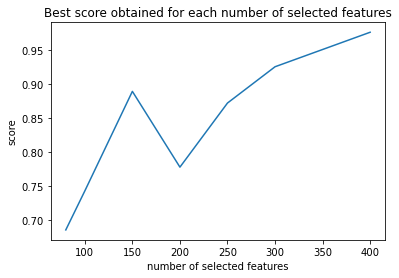

In [20]:
N = np.array([80,100,150,200,250,300,400])
best_subset, best_score = reliefF(y, D152, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [21]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9090909090909091, 0.9995335820895522, 0.975609756097561, 0.9981369352585002, 0.024390243902439025, 0.09090909090909091)


# Fast Correlation Based Filter algorithm (FCBF)

[   8   16   19   30   31   34   37   48   50   55   64   66   68   73
   76   77   80   82   86   90   96   98  103  105  115  122  131  135
  138  141  146  150  152  156  170  173  180  181  184  191  193  197
  199  209  222  228  229  230  232  236  241  248  252  261  290  293
  298  299  309  314  316  324  329  330  333  340  342  344  345  352
  356  366  379  380  383  390  393  397  402  407  411  414  419  427
  434  442  447  450  458  467  473  475  490  502  503  505  513  515
  521  525  534  547  549  550  563  564  565  570  575  579  593  594
  597  602  607  611  615  616  618  623  629  648  652  658  663  665
  666  669  674  688  692  694  698  699  701  702  703  720  723  725
  727  734  742  749  758  775  781  783  789  792  794  803  805  807
  816  818  819  822  827  830  835  838  842  848  854  856  859  862
  863  866  868  870  872  873  890  898  900  906  908  911  917  920
  921  922  925  926  928  930  934  940  954  963  964  974  982  988
  990 

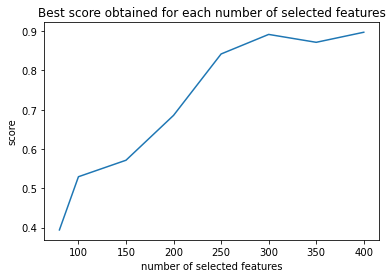

In [22]:
N = np.array([80,100,150,200,250,300,350,400])
best_subset, best_score = FCBF(y, D152, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [23]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.7954545454545454, 0.998262380538662, 0.8974358974358975, 0.9960988296488946, 0.10256410256410256, 0.20454545454545456)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/Users/theomaffei/opt/anaconda3/lib/python3.8/site-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 88. Number of blocks 4.4 will be approximated to 4.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
[  22   28   38   40   48   94   96  121  128  133  145  155  179  182
  196  197  202  207  214  222  235  241  260  262  276  301  321  322
  323  336  338  347  349  356  362  367  383  406  441  443  444  451
  458  463  466  478  489  496 

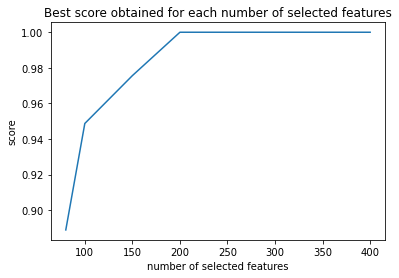

In [10]:
N = np.arange(130,150,1)
best_subset, best_score = HsicLasso(y, D152, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [25]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

150
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9545454545454546, 1.0, 1.0, 0.999031007751938, 0.0, 0.045454545454545456)


# Wrapper methods

# Stochastic optimization of features selection 

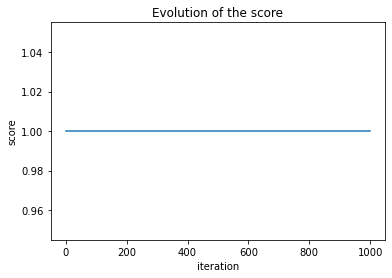

1.0


In [26]:
best_subset, best_score  = hillclimbing(y, D152, FamiliesClusters, compute_precision,True, 1000, 0.1, True)
print(best_score)

In [28]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1033
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9318181818181818, 1.0, 1.0, 0.9986027014438752, 0.0, 0.06818181818181818)


# Stimulated annealing

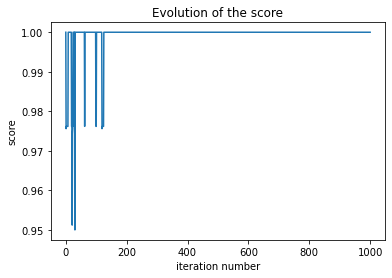

1.0


In [29]:
best_subset, best_score  = stimulated_annealing(y, D152, FamiliesClusters, compute_precision,True, 1000, 0.1, 1, True)
print(best_score)

In [30]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

972
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)


# Forward feature selection

In [3]:
N = np.array([80,100,150,200,250,300])
best_subset, best_score  = forward_feature_selection(y,AE3, FamiliesClusters, compute_precision, True, N, True)
print(best_score)

KeyboardInterrupt: 

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Backward feature selection

In [ ]:
N = np.array([80,100,150,200,250,300])
best_subset, best_score  = backward_feature_selection(y,AE3, FamiliesClusters, compute_precision, True, N, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Genetic feature selection algorithm

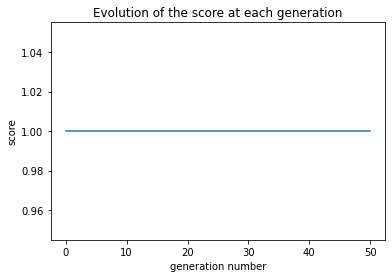

1.0


In [5]:
best_subset, best_score  = genetic_fs(y,D152,FamiliesClusters, compute_precision,True, 300, 0.5, 0.2, 50, 3, True)
print(best_score)

In [7]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

304
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9090909090909091, 1.0, 1.0, 0.9982046678635548, 0.0, 0.09090909090909091)


# Hybrid methods

# Mutual information and stimulated annealing

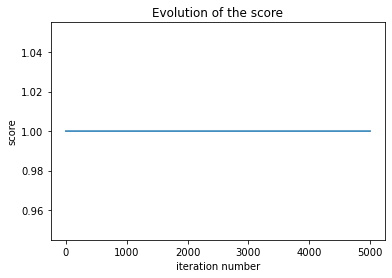

[   3   26   30   44   48   54  115  133  145  155  176  182  192  198
  199  202  214  219  227  231  241  245  254  265  271  298  299  314
  319  321  372  382  383  387  389  411  414  419  421  443  444  458
  480  489  505  558  564  569  570  583  588  592  593  623  653  662
  666  677  699  715  723  725  734  739  742  744  746  750  765  770
  775  780  802  810  828  834  851  854  883  903  912  914  919  920
  923  927  930  966  971  991  997 1023 1041 1050 1057 1060 1061 1068
 1088 1105 1112 1119 1130 1147 1148 1151 1181 1184 1195 1198 1207 1211
 1216 1226 1252 1256 1271 1273 1296 1301 1318 1328 1332 1348 1349 1351
 1356 1361 1380 1390 1392 1401 1410 1412 1414 1426 1440 1454 1457 1459
 1467 1475 1479 1489 1490 1491 1497 1515 1533 1562 1623 1635 1643 1644
 1655 1681 1687 1690 1721 1726 1729 1730 1731 1740 1753 1754 1769 1777
 1788 1799 1813 1819 1826 1833 1835 1842 1850 1857 1901 1902 1909 1917
 1919 1926 1938 1947 1956 1964 1972 1978 1987 2000 2018] 1.0


In [10]:
best_subset, best_score = MI_stimulated_annealing(y,D152, FamiliesClusters, compute_precision,True, np.array([400]), 3, 5000, 0.05, 1, True)
print(best_subset, best_score)

In [8]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

212
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8538461538461538, 0.9808488114714657, 0.5273159144893111, 0.9962854349951125, 0.47268408551068886, 0.14615384615384616)


# Mutual information and genetic feature selection

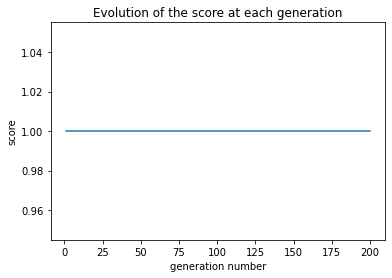

[   3   10   23   47   71   86   87   96  107  150  164  172  183  186
  192  197  201  202  204  206  222  238  241  254  267  275  286  288
  301  314  318  319  336  339  363  364  398  413  421  480  539  558
  567  570  589  593  618  638  644  663  664  670  692  698  715  721
  723  741  745  764  765  774  797  826  832  849  851  856  881  912
  956  966  991  993  996 1011 1013 1052 1072 1088 1105 1111 1137 1141
 1155 1164 1185 1194 1208 1275 1292 1296 1360 1414 1439 1444 1467 1481
 1497 1505 1515 1581 1588 1610 1687 1712 1728 1749 1750 1788 1826 1847
 1867 1874 1899 1902 1907 1934 1939 1961 1988 2010 2021 2029] 1.0


In [9]:
D152_best_subset, best_score = MI_genetic_fs(y,D152, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  300, 0.5, 0.2, 200, 3, True)
print(best_subset, D152_best_subset)

In [10]:
print(len(D152_best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D152[:, D152_best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

124
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)


In [9]:
D152_best = get_best_genes_names(D152_best_subset, '../data/processed_data/D152genes_interest.csv' ,'../data/optimized_subsets/D152genes_best.csv')